# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [75]:
credit = pd.read_csv('base_dummy.csv')

credit['mau'].value_counts()

mau
0    16260
1      390
Name: count, dtype: int64

In [24]:
X = credit.drop('mau', axis=1)
y = credit['mau']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [25]:
clf = DecisionTreeClassifier(random_state=42)

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

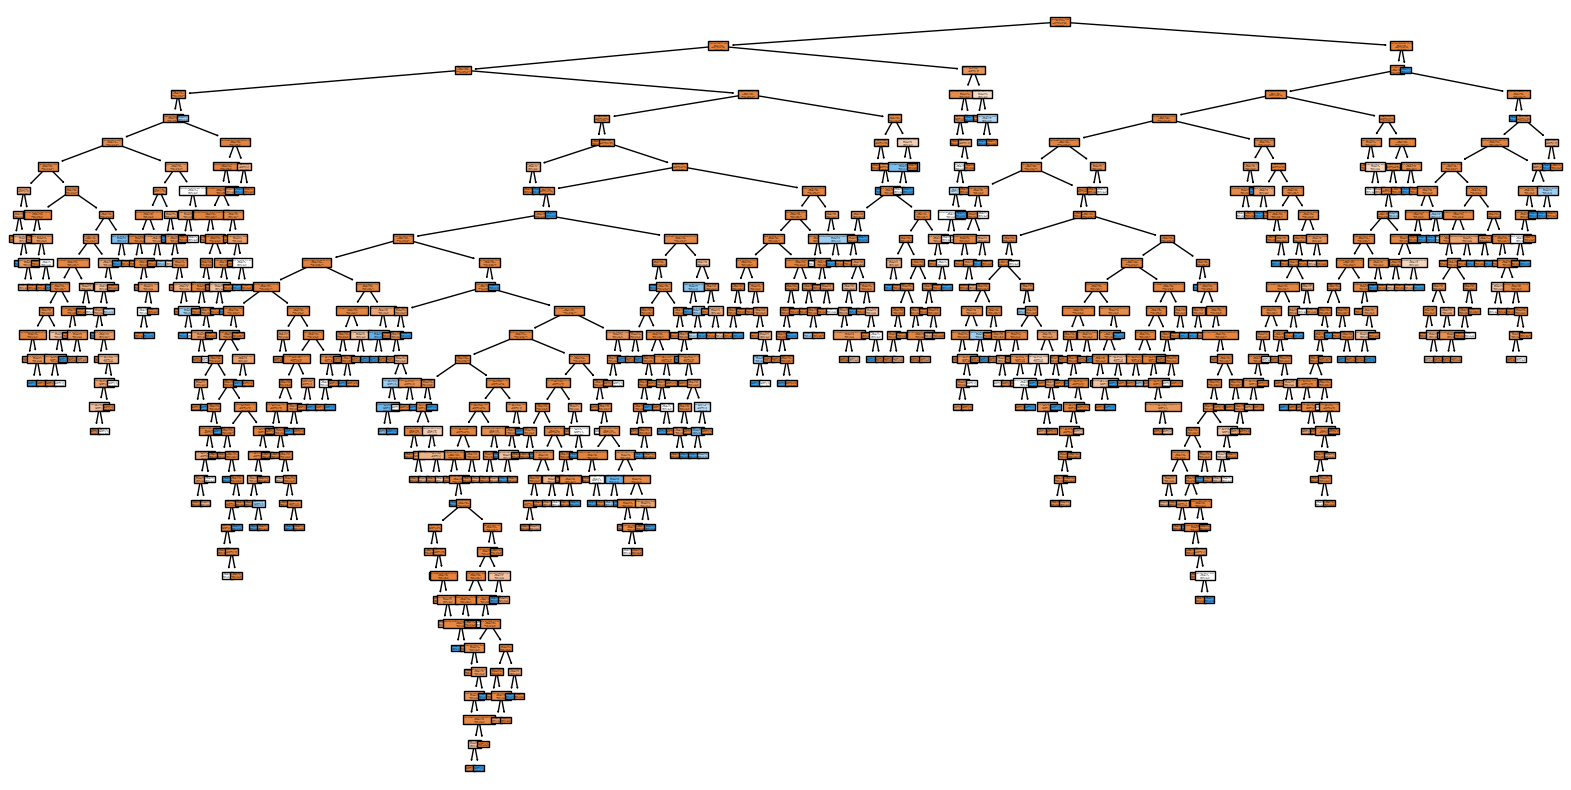

In [32]:
plt.figure(figsize=(20, 10))

plot_tree(clf,
          filled=True,
          class_names=['mau', 'bom'],
          feature_names=X_train.columns.tolist());

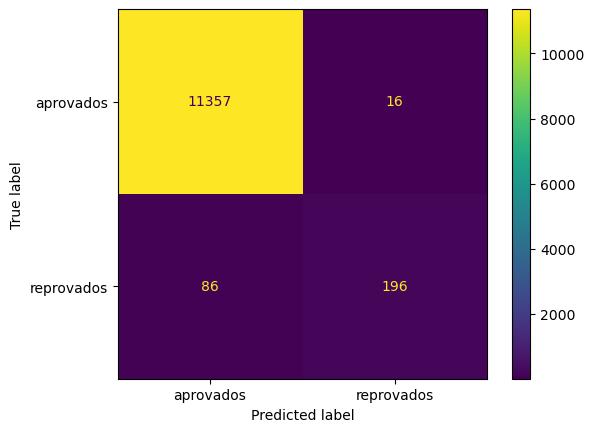

In [76]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['aprovados', 'reprovados']);

In [36]:
pred = clf.predict(X_train)
accuracy_score(y_train, pred)

0.9912483912483913

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

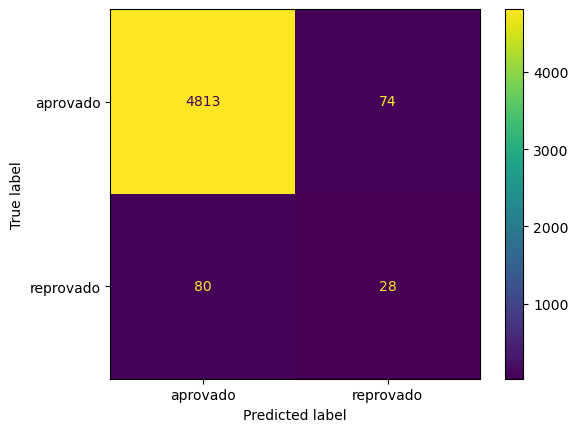

In [61]:
ConfusionMatrixDisplay.from_estimator(clf, X_valid, y_valid, display_labels=['aprovado', 'reprovado']);

In [57]:
pred = clf.predict(X_valid)

accuracy_score(y_valid, pred)



0.9691691691691692

In [55]:
clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

clf_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [60]:
y_pred_new = clf_new.predict(X_valid)
conf_matrix_new = confusion_matrix(y_valid, y_pred_new)




array([[4863,   24],
       [ 100,    8]], dtype=int64)

|          |      |      |
|----------|-------------------|-------------------|
|        TN                |        FP                  |
|        FN                |        TP                  |



In [69]:
tn, fp, fn, tp = conf_matrix_new.ravel()

# Calcular a proporção de proponentes classificados como 'maus'
proporcao_maus = tp / (tp + fn)

proporcao_maus * 100



7.4074074074074066

In [82]:
acuracia_se_todos_fossem_bons = tn / (tn + fn)

acuracia_se_todos_fossem_bons

0.9798508966350997